# INSTRUÇÃO PRÁTICA 009
## Revisao e consolidaçao do conteúdo de __Pandas__ avançado.
Para a pratica serão utilizados dados de estações metereologicas de Salvador dos anos de 2003, 2013 e 2023, diponiveis em: [Instituto Nacional de Meteorologia](https://portal.inmet.gov.br/dadoshistoricos). 

Os dados foram limpos e unidos em um unico DataFrama, com MultiIndex para colunas e indexadas por um DateTimeIndex.

### Carregando os dados

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd

estacao_ssa_2003 = pd.read_csv('estacao_Salvador_2003.CSV', header=8, sep=';', encoding='latin-1')
estacao_ssa_2013 = pd.read_csv('estacao_Salvador_2013.CSV', header=8, sep=',', encoding='utf-8')
estacao_ssa_2023 = pd.read_csv('estacao_Salvador_2023.CSV', header=8, sep=';', encoding='latin-1')

### Tratamento de dados

1. Removendo coluna extra unnamed

In [51]:
estacao_ssa_2003.drop(columns=['Unnamed: 19'], inplace=True)
estacao_ssa_2023.drop(columns=['Unnamed: 19'], inplace=True)

2. Unificando nomes de colunas

In [52]:
# pegando lista de nomes de colunas de cada dataframe
colunas_2003 = estacao_ssa_2003.columns.values.tolist() 
colunas_2013 = estacao_ssa_2013.columns.values.tolist()
colunas_2023 = estacao_ssa_2023.columns.values.tolist()

# renomeando colunas diferentes para o nome da coluna do dataframe de 2003
for c_2003, c_2013, c_2023 in zip(colunas_2003, colunas_2013, colunas_2023):
    if c_2003 != c_2013 or c_2003 != c_2023:
        estacao_ssa_2013.rename(columns={c_2013: c_2003}, inplace=True)
        estacao_ssa_2023.rename(columns={c_2023: c_2003}, inplace=True)
        

# concatenando os dataframes
estacao_ssa = pd.concat([estacao_ssa_2003, estacao_ssa_2013, estacao_ssa_2023], ignore_index=True)

3. Criando DateTimeIndex

In [53]:
# tratando coluna hora
mask_utc = estacao_ssa['HORA (UTC)'].str.contains('UTC')  # mascara para pegar apenas os dados com UTC

# trantando dados utc
dados_utc = estacao_ssa.loc[mask_utc, 'HORA (UTC)']
dados_utc = dados_utc.replace(' UTC', '', regex=True) # removendo UTC
dados_utc = dados_utc.str[0:2] + ':00' # pegando apenas a hora

# colocando os dados tratados no dataframe
estacao_ssa.loc[mask_utc, 'HORA (UTC)'] = dados_utc.values

In [54]:
# tratando coluna data
estacao_ssa['DATA (YYYY-MM-DD)'] = estacao_ssa['DATA (YYYY-MM-DD)'].str.replace('/', '-')

In [55]:
# criando DateTimeIndex a partir da coluna DATA (YYYY-MM-DD) e HORA (UTC)
estacao_ssa_index = pd.to_datetime(estacao_ssa['DATA (YYYY-MM-DD)'] + ' ' + estacao_ssa['HORA (UTC)'])

# removendo as colunas originais DATA (YYYY-MM-DD) e HORA (UTC)
estacao_ssa.drop(['DATA (YYYY-MM-DD)', 'HORA (UTC)'], axis=1, inplace=True)

# Define a coluna DATA HORA como índice
estacao_ssa.set_index(estacao_ssa_index, inplace=True)

4. Criando MultiIndex para colunas

In [56]:
# agrupando parametros de medição
nivel_1 = ['precipitacao'] + ['pressao']*3 + ['radiacao'] + ['temperatura']*6 + ['umidade']*3 + ['velocidade do vento']*3
nivel_2 = colunas_2003[2:]

# definindo multiindex para as colunas
index_col = pd.MultiIndex.from_arrays([nivel_1, nivel_2], names=['medicao', 'tipo'])

estacao_ssa.columns = index_col

5. Removendo colunas desnecessárias

In [57]:
estacao_ssa.drop(['pressao', 'radiacao', 'umidade', 'velocidade do vento'], axis=1, inplace=True)

6. Transformando colunas de string para float

In [58]:
# substiduindo valores , por .
estacao_ssa.replace(',', '.', regex=True, inplace=True)

# convertendo para float
estacao_ssa = estacao_ssa.astype('float64')

7. Tratando valores nulos

In [59]:
# tiranddo todos os possiveis valores nulos
estacao_ssa.replace(['-9999', -9999, -9999.0, '-9999.0'], value= None, inplace=True)

# preenchendo valores nulos
estacao_ssa.bfill(inplace=True)

### DataFrame final

In [60]:
estacao_ssa.head()

medicao                                 precipitacao  \
tipo                PRECIPITAÇÃO TOTAL, HORÁRIO (mm)   
2003-01-01 00:00:00                              0.0   
2003-01-01 01:00:00                              0.0   
2003-01-01 02:00:00                              0.0   
2003-01-01 03:00:00                              0.0   
2003-01-01 04:00:00                              0.0   

medicao                                              temperatura  \
tipo                TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
2003-01-01 00:00:00                                         26.4   
2003-01-01 01:00:00                                         26.4   
2003-01-01 02:00:00                                         26.4   
2003-01-01 03:00:00                                         26.4   
2003-01-01 04:00:00                                         26.4   

medicao                                                   \
tipo                TEMPERATURA DO PONTO DE ORVALHO (°C)   
2003-01-01 00:00:00                                 22.0   
2003-01-01 01:00:00                                 22.0   
2003-01-01 02:00:00                                 22.0   
2003-01-01 03:00:00                                 22.0   
2003-01-01 04:00:00                                 22.0   

medicao                                                         \
tipo                TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)   
2003-01-01 00:00:00                                       27.2   
2003-01-01 01:00:00                                       27.2   
2003-01-01 02:00:00                                       27.2   
2003-01-01 03:00:00                                       27.2   
2003-01-01 04:00:00                                       27.2   

medicao                                                         \
tipo                TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   
2003-01-01 00:00:00                                       26.3   
2003-01-01 01:00:00                                       26.3   
2003-01-01 02:00:00                                       26.3   
2003-01-01 03:00:00                                       26.3   
2003-01-01 04:00:00                                       26.3   

medicao                                                               \
tipo                TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   
2003-01-01 00:00:00                                             22.6   
2003-01-01 01:00:00                                             22.6   
2003-01-01 02:00:00                                             22.6   
2003-01-01 03:00:00                                             22.6   
2003-01-01 04:00:00                                             22.6   

medicao                                                               
tipo                TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)  
2003-01-01 00:00:00                                             21.0  
2003-01-01 01:00:00                                             21.0  
2003-01-01 02:00:00                                             21.0  
2003-01-01 03:00:00                                             21.0  
2003-01-01 04:00:00                                             21.0

In [61]:
estacao_ssa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2003-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   (precipitacao, PRECIPITAÇÃO TOTAL, HORÁRIO (mm))                 26280 non-null  float64
 1   (temperatura, TEMPERATURA DO AR - BULBO SECO, HORARIA (°C))      26280 non-null  float64
 2   (temperatura, TEMPERATURA DO PONTO DE ORVALHO (°C))              26280 non-null  float64
 3   (temperatura, TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C))        26280 non-null  float64
 4   (temperatura, TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C))        26280 non-null  float64
 5   (temperatura, TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C))  26280 non-null  float64
 6   (temperatura, TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C))  26280 non-null  float64
dtypes: flo

In [62]:
estacao_ssa.describe()

medicao                     precipitacao  \
tipo    PRECIPITAÇÃO TOTAL, HORÁRIO (mm)   
count                       26280.000000   
mean                            0.202785   
std                             1.333296   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                            52.000000   

medicao                                  temperatura  \
tipo    TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
count                                   26280.000000   
mean                                       25.867500   
std                                         2.377785   
min                                        19.500000   
25%                                        24.000000   
50%                                        25.600000   
75%                                        27.300000   
max                                        39.700000   

medicao                                       \
tipo    TEMPERATURA DO PONTO DE ORVALHO (°C)   
count                           26280.000000   
mean                               21.679768   
std                                 1.382037   
min                                14.700000   
25%                                20.700000   
50%                                21.900000   
75%                                22.600000   
max                                26.600000   

medicao                                             \
tipo    TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)   
count                                 26280.000000   
mean                                     26.370327   
std                                       2.527563   
min                                      20.100000   
25%                                      24.400000   
50%                                      26.000000   
75%                                      28.000000   
max                                      43.300000   

medicao                                             \
tipo    TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   
count                                 26280.000000   
mean                                     25.393565   
std                                       2.185660   
min                                      19.300000   
25%                                      23.700000   
50%                                      25.200000   
75%                                      26.700000   
max                                      33.000000   

medicao                                                   \
tipo    TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   
count                                       26280.000000   
mean                                           22.143900   
std                                             1.449447   
min                                            15.300000   
25%                                            21.200000   
50%                                            22.300000   
75%                                            23.200000   
max                                            27.400000   

medicao                                                   
tipo    TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)  
count                                       26280.000000  
mean                                           21.228242  
std                                             1.421677  
min                                            -1.800000  
25%                                            20.300000  
50%                                            21.500000  
75%                                            22.300000  
max                                            25.100000

### Analise de dados

In [64]:
pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 292.6 kB/s eta 0:00:001m286.2 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
import matplotlib.pyplot as plt
%matplotlib widget

1. Subplot com evolução das temperaturas médias e acumulado de precipitações nos três anos.

2. Acumulado de precipitações de Junho nos três anos.

3. Temperatura media de cada um dos dias de Março nos três anos.

In [91]:
dados_marco_max = estacao_ssa[('temperatura', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)')][estacao_ssa.index.month == 3]
dados_marco_min = estacao_ssa[('temperatura', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)')][estacao_ssa.index.month == 3]


# Somando as temperaturas mínimas e máximas para cada dia
temperatura_media_diaria = (dados_marco_min + dados_marco_max)/2
#print(temperatura_media_diaria)

df_marco = estacao_ssa.xs(3, level='month')

# Plotando os gráficos
plt.figure(figsize=(10, 5))


#for i, (ano, dados) in enumerate(temperatura_media_diaria.groupby(temperatura_media_diaria.index.get_level_values(0))):
 #   plt.plot(dados.index.get_level_values(1), dados.values, color=cores[i], alpha=0.7, label=f'Ano {ano}', marker='o')  # Adicionando marcadores para cada ponto

#for ano in df_marco.index.get_level_values('ano').unique():
 #   plt.plot(df_marco.loc[ano]['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], label=f'Ano {year}')

# Adicionando legendas e rótulos aos eixos
plt.legend()
plt.xlabel('Dias de Março')
plt.ylabel('Temperatura (°C)')

# Exibindo o gráfico
plt.title('Variação da Temperatura em Março ao Longo de Três Anos')
plt.show()

TypeError: Index must be a MultiIndex

Variável     Temperatura       Umidade       Precipitação        \
Período            Manhã Tarde   Manhã Tarde        Manhã Tarde   
Ano  Mês Dia                                                      
2022 1   1            61    34      42    44           20    89   
         2            25    45      85    11           53    57   
         3            90    15      91    92           23    55   
         4            88    99      92    51            1    57   
         5            90    67      92    43            7     6   
...                  ...   ...     ...   ...          ...   ...   
2024 12  27           95    84      42     7            2    98   
         28           83     0      10    81            5    52   
         29           99    46      98    38           25    83   
         30           70    36      22    90           83    44   
         31           34    49      44    22           76    28   

Variável     Radiação Solar        
Período               Man

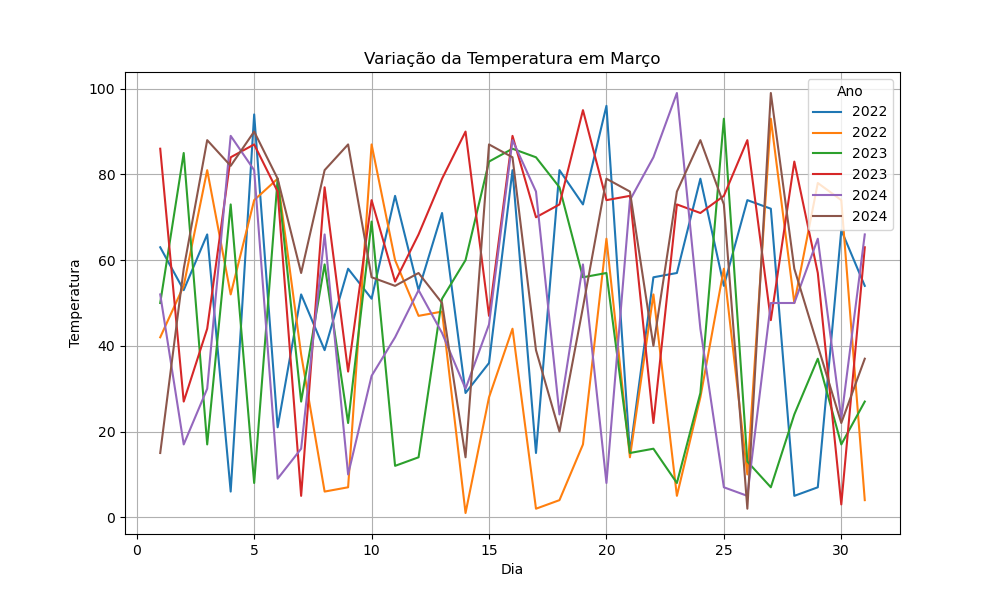

In [100]:

import numpy as np

# Criando datas para três anos distintos (2022, 2023 e 2024)
dates = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')

# Criando índice com MultiIndex para representar ano, mês e dia
index = pd.MultiIndex.from_tuples([(date.year, date.month, date.day) for date in dates],
                                  names=['Ano', 'Mês', 'Dia'])

# Criando as colunas para temperatura, umidade do ar, precipitação e radiação solar
columns = pd.MultiIndex.from_product([['Temperatura', 'Umidade', 'Precipitação', 'Radiação Solar'],
                                      ['Manhã', 'Tarde']],
                                     names=['Variável', 'Período'])

# Gerando dados aleatórios para cada variável
data = np.random.randint(0, 100, size=(len(dates), len(columns)))

# Criando o DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

# Exibindo o DataFrame
print(df)
# Acessando os dados de temperatura do mês de março de todos os anos
temperatura_marco = df.loc[(slice(None), 3), 'Temperatura']
print(temperatura_marco)

# Acessando os dados de temperatura do mês de março de todos os anos
temperatura_marco = df.loc[(slice(None), 3), 'Temperatura']

# Plotando os dados
plt.figure(figsize=(10, 6))

for year in range(2022, 2025):
    temperatura_ano = temperatura_marco.loc[year]
    plt.plot(temperatura_ano.index.get_level_values('Dia'), temperatura_ano.values, label=str(year))

plt.title('Variação da Temperatura em Março')
plt.xlabel('Dia')
plt.ylabel('Temperatura')
plt.legend(title='Ano')
plt.grid(True)
plt.show()



4. Temperatura máxima e mínima de cada uma das estações nos tres anos. Sendo:
   - Verão (Janeiro, Fevereiro e Março)
   - Outono (Abril, Maio e Junho) 
   - Inverno (Julho, Agosto e Setembro)
   - Primavera (Outubro, Novembro e Dezembro).

5. Comportamente de temperatura media do dia 28 de Setembro em cada um dos intervalos do dia dos três anos. Sendo:
   - Madrugada (00:00 a 06:00), 
   - Manha (06:00 a 12:00)
   - Tarde (12:00 a 18:00)
   - Noite (18:00 a 00:00)